# "Análise de Dados: Um olhar sobre os resultados do FSA - Fundo Setorial Audiovisual e Renúncia Fiscal"

## Análise Exploratória

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import catboost
import ydata_profiling as yp
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

---

## Limpeza e Preparação

In [4]:
df_proj_renun_fisc = pd.read_csv('ProjetosRenunciaFiscal.csv')
df_proj_renun_fisc.head(5)
df_proj_renun_fisc_clean = df_proj_renun_fisc[['SALIC', 'TITULO_PROJETO', 'UF_PROPONENTE',
       'SITUACAO_REGISTRO', 'CNPJ_PROPONENTE', 'RAZAO_SOCIAL_PROPONENTE',
       'LEI_8313', 'ART1', 'ART1A', 'ART3', 'ART3A', 'ART39', 'FUNCINES',
       'TOTAL_CAPTADO', 'DT_APROVACAO_CAPTACAO', 'DT_1_LIBERACAO']]

def to_datetime(df, coluna):
    df[coluna] = pd.to_datetime(df[coluna], dayfirst=True)

to_datetime(df_proj_renun_fisc_clean, 'DT_1_LIBERACAO')
to_datetime(df_proj_renun_fisc_clean, 'DT_APROVACAO_CAPTACAO')

def to_datetime_b(df, coluna):
    df['ANO_APROVACAO'] = pd.to_datetime(df[coluna],format='%Y-%m-%d').dt.year


to_datetime_b(df_proj_renun_fisc_clean, 'DT_APROVACAO_CAPTACAO')


df_proj_renun_fisc = df_proj_renun_fisc_clean

#-----------------------------------------------------------

df_invest_proj_renun_fiscal = pd.read_csv('InvestidoresEmProjetosRenunciaFiscal.csv')




#---------------------------------

df_proj_fsa_desemb = pd.read_csv('ProjetosContratadosFSAeDesembolso.csv')
df_proj_fsa_desemb

df_proj_fsa_desemb_clean = df_proj_fsa_desemb[['IDENTIFICACAO_CONTRATO', 'TITULO_PROJETO', 'CHAMADA_PUBLICA',
       'ANO_CHAMADA_PUBLICA', 'CNPJ_PROPONENTE', 'RAZAO_SOCIAL_PROPONENTE',
       'RAZAO_SOCIAL_PRODUTORA',
       'RAZAO_SOCIAL_DISTRIBUIDORA_PROGRAMADORA', 'DT_PUBLICACAO_CONTRATO_DOU',
       'VL_CONTRATO_DOU', 'DT_PRIMEIRO_DESEMBOLSO', 'VL_TOTAL_LIBERADO']]



def to_datetime(df, coluna):
    df[coluna] = pd.to_datetime(df[coluna], dayfirst=True, errors='coerce')

to_datetime(df_proj_fsa_desemb_clean, 'DT_PRIMEIRO_DESEMBOLSO')

def to_datetime_b(df, coluna):
    df[coluna] = pd.to_datetime(df[coluna],format='%Y')

to_datetime_b(df_proj_fsa_desemb_clean, 'ANO_CHAMADA_PUBLICA')


def to_datetime_c(df, coluna, date_format):
    df[coluna] = pd.to_datetime(df[coluna], format=date_format)

to_datetime_c(df_proj_fsa_desemb_clean, 'DT_PUBLICACAO_CONTRATO_DOU', '%Y-%m-%d')

#Preenchendo valores nulos na copluna DT_PRIMEIRO_DESEMBOLSO com a média = 37 dias

df_proj_fsa_desemb_clean_time = df_proj_fsa_desemb_clean.dropna()
df_proj_fsa_desemb_clean_time['TEMPO_DESEMBOLSO'] = df_proj_fsa_desemb_clean['DT_PUBLICACAO_CONTRATO_DOU'] - df_proj_fsa_desemb_clean['DT_PRIMEIRO_DESEMBOLSO']
mean = df_proj_fsa_desemb_clean_time['TEMPO_DESEMBOLSO'].mean()

def to_datetime_a(df, coluna,coluna2):
    df[coluna] = df[coluna].fillna(pd.to_datetime(df[coluna2])+ pd.DateOffset(day=37))

to_datetime_a(df_proj_fsa_desemb_clean, 'DT_PRIMEIRO_DESEMBOLSO', 'DT_PUBLICACAO_CONTRATO_DOU')

df_proj_fsa_desemb = df_proj_fsa_desemb_clean






C:\Users\syafo\AppData\Local\Temp\ipykernel_19132\3590830806.py:9: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[coluna] = pd.to_datetime(df[coluna], dayfirst=True)
C:\Users\syafo\AppData\Local\Temp\ipykernel_19132\3590830806.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna] = pd.to_datetime(df[coluna], dayfirst=True)
C:\Users\syafo\AppData\Local\Temp\ipykernel_19132\3590830806.py:9: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[coluna] = pd.to_datetime(df[coluna], dayfirst=True)
C:\Users\syafo\AppData\Local\Temp\ipykernel_19

In [5]:
df_proj_renun_fisc

,SALIC,TITULO_PROJETO,UF_PROPONENTE,SITUACAO_REGISTRO,CNPJ_PROPONENTE,RAZAO_SOCIAL_PROPONENTE,LEI_8313,ART1,ART1A,ART3,ART3A,ART39,FUNCINES,TOTAL_CAPTADO,DT_APROVACAO_CAPTACAO,DT_1_LIBERACAO,ANO_APROVACAO
0,04-0353,O DIA EM QUE O BRASIL ESTEVE AQUI,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,190000.0,440000.0,0.0,0.00,0.0,0.00,0.0,630000.00,2005-03-23,2006-12-15,2005
1,06-0305,A Hora e a Vez de Augusto Matraga,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,0.0,2604045.0,970000.0,0.00,0.0,0.00,0.0,3574045.00,2007-05-25,2009-07-16,2007
2,06-0412,Estação Liberdade,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,0.0,310251.0,1000000.0,0.00,0.0,0.00,0.0,1310251.00,2007-03-07,2010-12-29,2007
3,07-0251,Rio Breaks - Uma Estória de Surfe e Sobrevivên...,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,162500.0,0.0,0.0,0.00,0.0,0.00,0.0,162500.00,2007-12-14,2009-05-15,2007
4,07-0517,O Guia (ex-Cozinha Punk),SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,0.0,0.0,0.0,0.00,0.0,704999.78,0.0,704999.78,2008-03-13,2008-10-29,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,00-0333,Tainá Uma Aventura na Amazônia - Distribuição,SP,DEFERIDO,96.274.915/0001-64,TIETÊ PRODUÇÕES CINEMATOGRÁFICAS LTDA,0.0,1330434.0,0.0,859632.64,0.0,0.00,0.0,2190066.64,2000-09-26,2001-02-15,2000
2912,01-3660,Tainá 2 - Aventura Continua (A),SP,DEFERIDO,96.274.915/0001-64,TIETÊ PRODUÇÕES CINEMATOGRÁFICAS LTDA,1737500.0,3000000.0,0.0,1800000.00,0.0,0.00,0.0,6537500.00,2001-10-29,2003-02-20,2001
2913,07-0295,A Margem da Linha,SP,DEFERIDO,96.496.633/0001-01,CINERAMA FILMES-CF EIRELI,260000.0,0.0,0.0,0.00,0.0,0.00,0.0,260000.00,2007-09-05,2010-12-10,2007
2914,13-0522,Economia Brasileira - A História Contada por Q...,SP,IRREGULAR,97.533.170/0001-73,CULTURA MAIOR COMUNICACAO E CULTURA LTDA. - ME,0.0,0.0,1340000.0,0.00,0.0,0.00,0.0,1340000.00,2013-12-24,2014-09-15,2013


---

## EDA - FSA e Renúncia Fiscal - Investidores e Contemplados

- ### Investidores

In [6]:
df_invest_proj_renun_fiscal.head(5)

,CNPJ_INVESTIDOR,INVESTIDOR,ART25,ART18,ART1A,ART1,ART39,ART3A,ART3,ART41,VL_TOTAL_INVESTIDO
0,00.000.000/0001-91,BANCO DO BRASIL S.A.,1.090267e+06,0.0,100000.0,0.00,0.0,0.0,0.0,0.0,1.190267e+06
1,00.000.208/0001-00,BRB - BANCO DE BRASÍLIA S.A.,1.450000e+05,0.0,0.0,129999.18,0.0,0.0,0.0,0.0,2.749992e+05
2,00.001.180/0001-26,CENTRAIS ELÉTRICAS BRASILEIRAS S.A. - ELETROBRÁS,1.250000e+06,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.250000e+06
3,00.001.180/0002-07,ELETROBRÁS - CENTRAIS ELÉTRICAS BRASILEIRAS S.A.,4.196216e+07,455000.0,12380700.2,499630.00,0.0,0.0,0.0,0.0,5.529749e+07
4,00.014.385/0001-46,BV TRADING S/A,0.000000e+00,0.0,0.0,2000.00,0.0,0.0,0.0,0.0,2.000000e+03


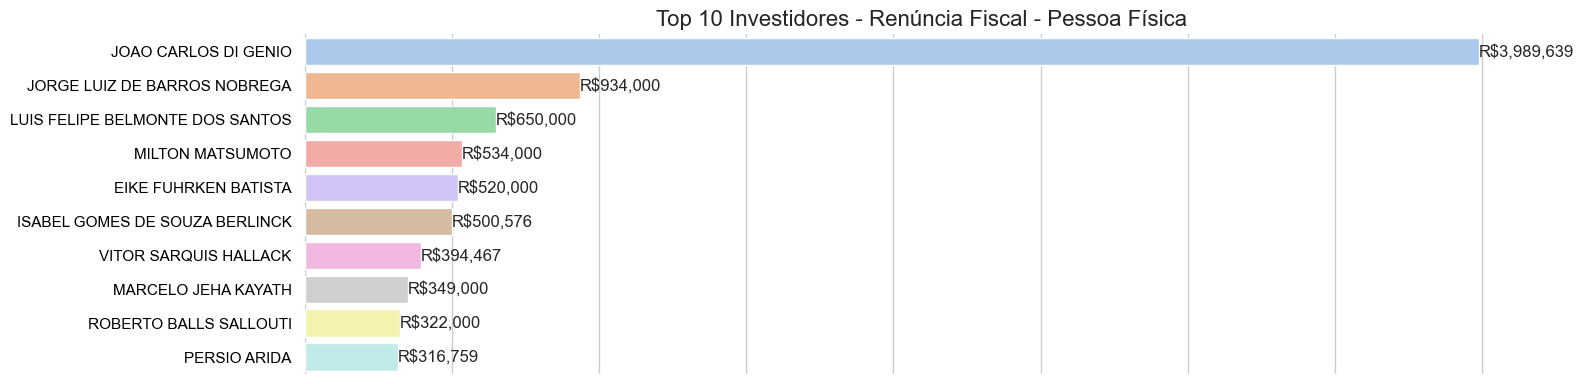

In [7]:
#Top 10 Investidores - Renúncia Fiscal
top_invest = df_invest_proj_renun_fiscal.loc[df_invest_proj_renun_fiscal['CNPJ_INVESTIDOR'] == 'Pessoa Fisica']
top_invest
top_invest_top = top_invest.sort_values(by='VL_TOTAL_INVESTIDO', ascending=False).head(10)

plt.figure(figsize=(16, 4))
sns.set_theme(style="whitegrid")


sns.set_color_codes("pastel")
sns.barplot(x="VL_TOTAL_INVESTIDO", y="INVESTIDOR", data=top_invest_top,
            label="VL_TOTAL_INVESTIDO", palette="pastel")

for index, value in enumerate(top_invest_top['VL_TOTAL_INVESTIDO']):
    plt.text(value, index, f'R${value:,.0f}', va='center', fontsize=12)

plt.xlabel("")
plt.ylabel("")
plt.title("Top 10 Investidores - Renúncia Fiscal - Pessoa Física", fontsize=16)

sns.despine(left=True, bottom=True)

plt.yticks(color='black')

def format_labels(value, pos):
    return 

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_labels))
plt.tight_layout()
plt.show()


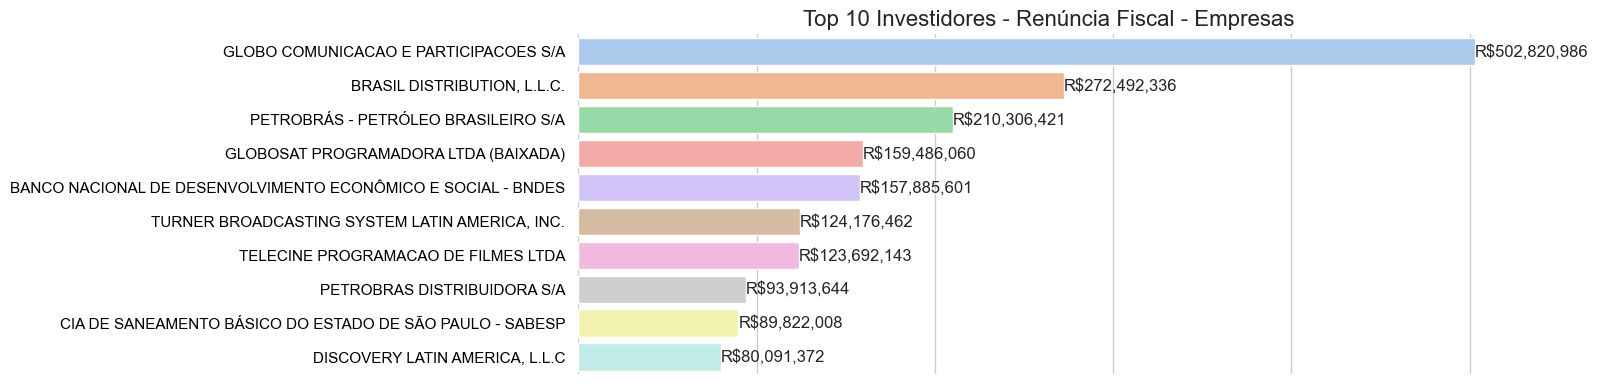

In [8]:
#Top 10 Investidores - Renúncia Fiscal
top_invest = df_invest_proj_renun_fiscal.sort_values(by='VL_TOTAL_INVESTIDO', ascending=False).head(10)

plt.figure(figsize=(16, 4))
sns.set_theme(style="whitegrid")


sns.set_color_codes("pastel")
sns.barplot(x="VL_TOTAL_INVESTIDO", y="INVESTIDOR", data=top_invest,
            label="VL_TOTAL_INVESTIDO", palette="pastel")

for index, value in enumerate(top_invest['VL_TOTAL_INVESTIDO']):
    plt.text(value, index, f'R${value:,.0f}', va='center', fontsize=12)

plt.xlabel("")
plt.ylabel("")
plt.title("Top 10 Investidores - Renúncia Fiscal - Empresas", fontsize=16)

sns.despine(left=True, bottom=True)

plt.yticks(color='black')

def format_labels(value, pos):
    return 

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_labels))
plt.tight_layout()
plt.show()


- ### Contemplados

In [9]:
df_proj_renun_fisc.head(5)

,SALIC,TITULO_PROJETO,UF_PROPONENTE,SITUACAO_REGISTRO,CNPJ_PROPONENTE,RAZAO_SOCIAL_PROPONENTE,LEI_8313,ART1,ART1A,ART3,ART3A,ART39,FUNCINES,TOTAL_CAPTADO,DT_APROVACAO_CAPTACAO,DT_1_LIBERACAO,ANO_APROVACAO
0,04-0353,O DIA EM QUE O BRASIL ESTEVE AQUI,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,190000.0,440000.0,0.0,0.0,0.0,0.00,0.0,630000.00,2005-03-23,2006-12-15,2005
1,06-0305,A Hora e a Vez de Augusto Matraga,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,0.0,2604045.0,970000.0,0.0,0.0,0.00,0.0,3574045.00,2007-05-25,2009-07-16,2007
2,06-0412,Estação Liberdade,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,0.0,310251.0,1000000.0,0.0,0.0,0.00,0.0,1310251.00,2007-03-07,2010-12-29,2007
3,07-0251,Rio Breaks - Uma Estória de Surfe e Sobrevivên...,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,162500.0,0.0,0.0,0.0,0.0,0.00,0.0,162500.00,2007-12-14,2009-05-15,2007
4,07-0517,O Guia (ex-Cozinha Punk),SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,0.0,0.0,0.0,0.0,0.0,704999.78,0.0,704999.78,2008-03-13,2008-10-29,2008


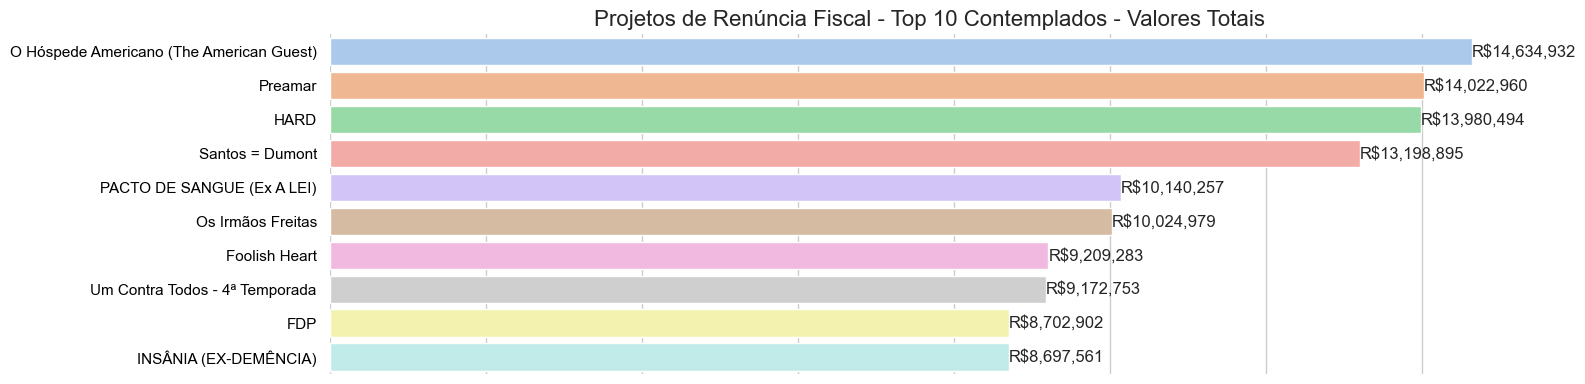

In [10]:
#Top 10 Investidores - Renúncia Fiscal
top_invest = df_proj_renun_fisc.sort_values(by='TOTAL_CAPTADO', ascending=False).head(10)

plt.figure(figsize=(16, 4))
sns.set_theme(style="whitegrid")


sns.set_color_codes("pastel")
sns.barplot(x="TOTAL_CAPTADO", y="TITULO_PROJETO", data=top_invest,
            label="TOTAL_CAPTADO", palette="pastel")

for index, value in enumerate(top_invest['TOTAL_CAPTADO']):
    plt.text(value, index, f'R${value:,.0f}', va='center', fontsize=12)

plt.xlabel("")
plt.ylabel("")
plt.title("Projetos de Renúncia Fiscal - Top 10 Contemplados - Valores Totais", fontsize=16)

sns.despine(left=True, bottom=True)

plt.yticks(color='black')

def format_labels(value, pos):
    return 

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_labels))
plt.tight_layout()
plt.show()


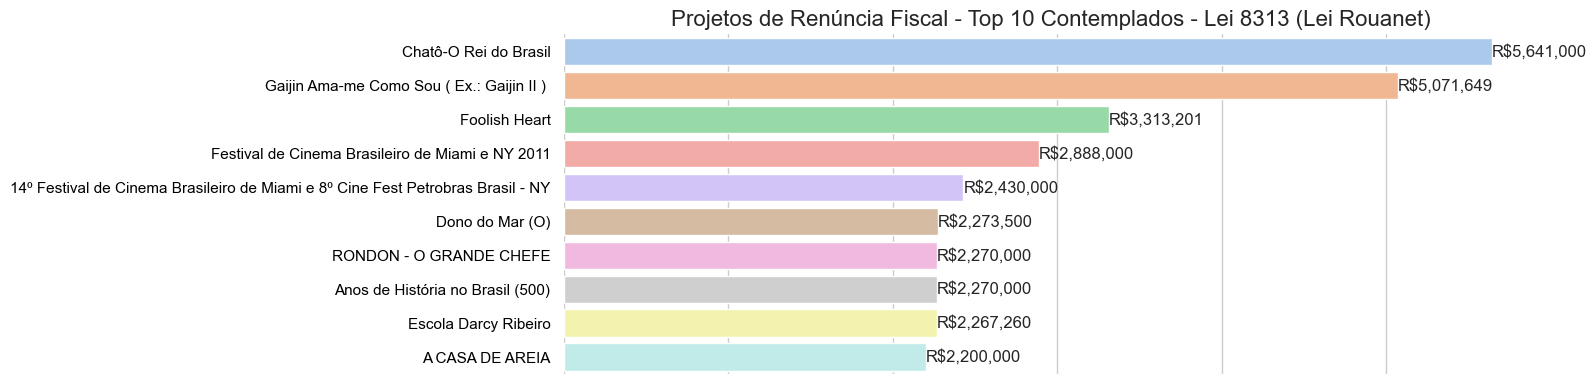

In [11]:
#Top 10 Investidores - Renúncia Fiscal
top_invest = df_proj_renun_fisc.sort_values(by='LEI_8313', ascending=False).head(10)

plt.figure(figsize=(16, 4))
sns.set_theme(style="whitegrid")


sns.set_color_codes("pastel")
sns.barplot(x="LEI_8313", y="TITULO_PROJETO", data=top_invest,
            label="LEI_8313", palette="pastel")

for index, value in enumerate(top_invest['LEI_8313']):
    plt.text(value, index, f'R${value:,.0f}', va='center', fontsize=12)

plt.xlabel("")
plt.ylabel("")
plt.title("Projetos de Renúncia Fiscal - Top 10 Contemplados - Lei 8313 (Lei Rouanet)", fontsize=16)

sns.despine(left=True, bottom=True)

plt.yticks(color='black')

def format_labels(value, pos):
    return 

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_labels))
plt.tight_layout()
plt.show()


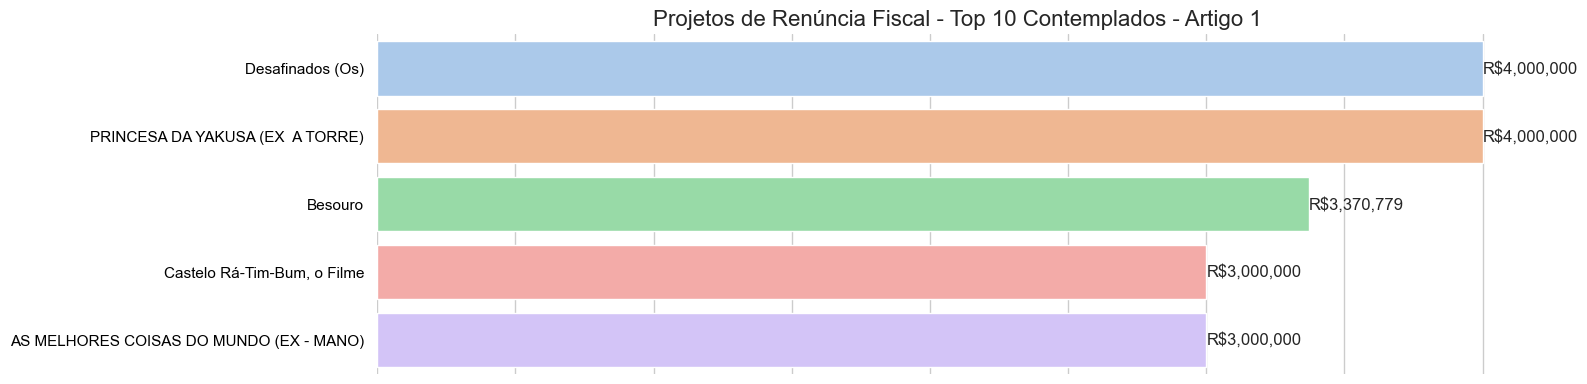

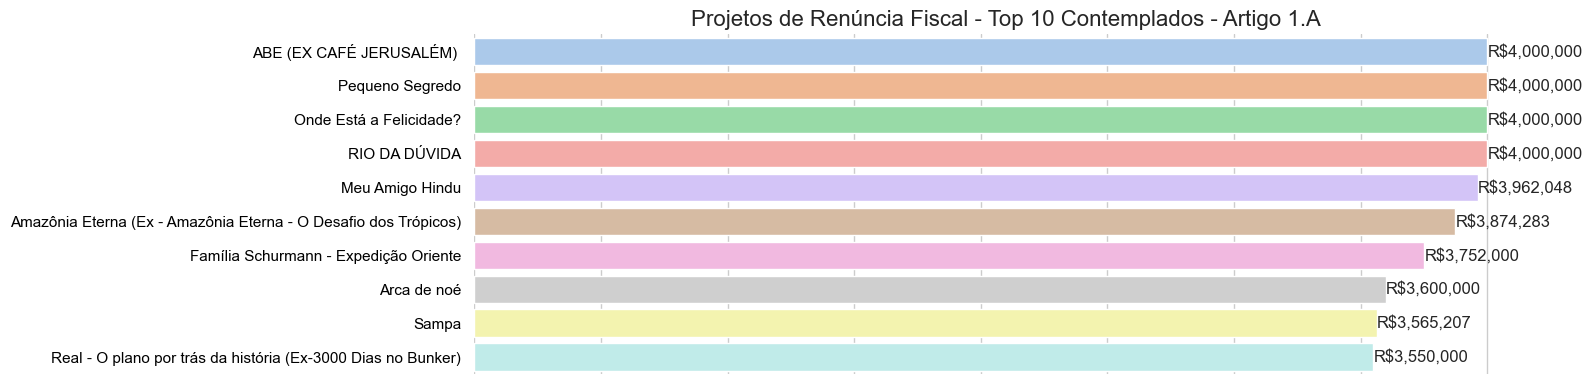

In [12]:

top_invest = df_proj_renun_fisc.sort_values(by='ART1', ascending=False).head(5)

plt.figure(figsize=(16, 4))
sns.set_theme(style="whitegrid")


sns.set_color_codes("pastel")
sns.barplot(x="ART1", y="TITULO_PROJETO", data=top_invest,
            label="ART1", palette="pastel")

for index, value in enumerate(top_invest['ART1']):
    plt.text(value, index, f'R${value:,.0f}', va='center', fontsize=12)

plt.xlabel("")
plt.ylabel("")
plt.title("Projetos de Renúncia Fiscal - Top 10 Contemplados - Artigo 1", fontsize=16)

sns.despine(left=True, bottom=True)

plt.yticks(color='black')

def format_labels(value, pos):
    return 

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_labels))
plt.tight_layout()
plt.show()


top_invest = df_proj_renun_fisc.sort_values(by='ART1A', ascending=False).head(10)

plt.figure(figsize=(16, 4))
sns.set_theme(style="whitegrid")


sns.set_color_codes("pastel")
sns.barplot(x="ART1A", y="TITULO_PROJETO", data=top_invest,
            label="ART1A", palette="pastel")

for index, value in enumerate(top_invest['ART1A']):
    plt.text(value, index, f'R${value:,.0f}', va='center', fontsize=12)

plt.xlabel("")
plt.ylabel("")
plt.title("Projetos de Renúncia Fiscal - Top 10 Contemplados - Artigo 1.A", fontsize=16)

sns.despine(left=True, bottom=True)

plt.yticks(color='black')

def format_labels(value, pos):
    return 

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_labels))
plt.tight_layout()
plt.show()


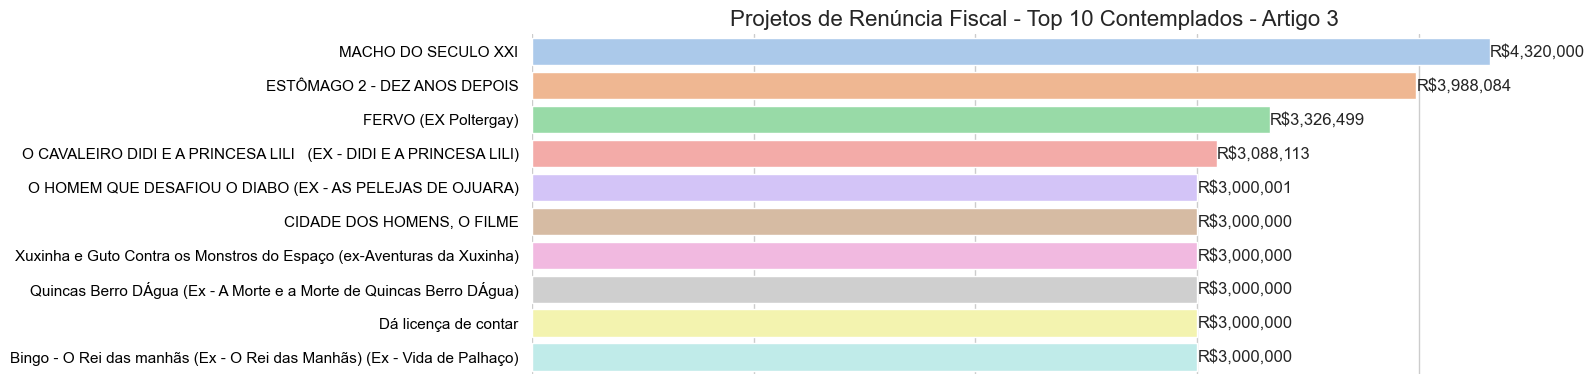

In [13]:
#Top 10 Investidores - Renúncia Fiscal
top_invest = df_proj_renun_fisc.sort_values(by='ART3', ascending=False).head(10)

plt.figure(figsize=(16, 4))
sns.set_theme(style="whitegrid")


sns.set_color_codes("pastel")
sns.barplot(x="ART3", y="TITULO_PROJETO", data=top_invest,
            label="ART3", palette="pastel")

for index, value in enumerate(top_invest['ART3']):
    plt.text(value, index, f'R${value:,.0f}', va='center', fontsize=12)

plt.xlabel("")
plt.ylabel("")
plt.title("Projetos de Renúncia Fiscal - Top 10 Contemplados - Artigo 3", fontsize=16)

sns.despine(left=True, bottom=True)

plt.yticks(color='black')

def format_labels(value, pos):
    return 

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_labels))
plt.tight_layout()
plt.show()


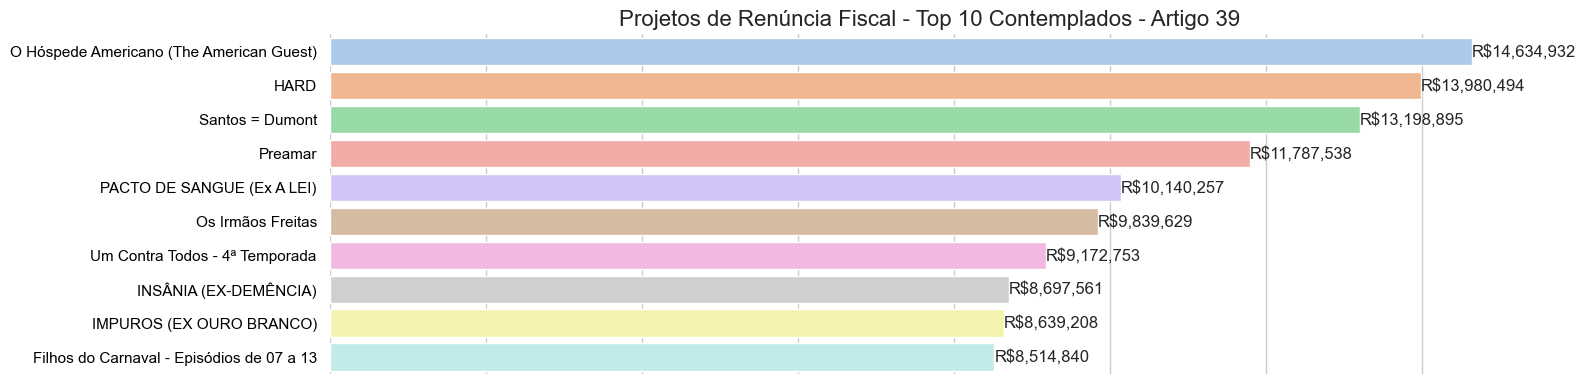

In [14]:
#Top 10 Investidores - Renúncia Fiscal
top_invest = df_proj_renun_fisc.sort_values(by='ART39', ascending=False).head(10)

plt.figure(figsize=(16, 4))
sns.set_theme(style="whitegrid")


sns.set_color_codes("pastel")
sns.barplot(x="ART39", y="TITULO_PROJETO", data=top_invest,
            label="ART39", palette="pastel")

for index, value in enumerate(top_invest['ART39']):
    plt.text(value, index, f'R${value:,.0f}', va='center', fontsize=12)

plt.xlabel("")
plt.ylabel("")
plt.title("Projetos de Renúncia Fiscal - Top 10 Contemplados - Artigo 39", fontsize=16)

sns.despine(left=True, bottom=True)

plt.yticks(color='black')

def format_labels(value, pos):
    return 

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_labels))
plt.tight_layout()
plt.show()


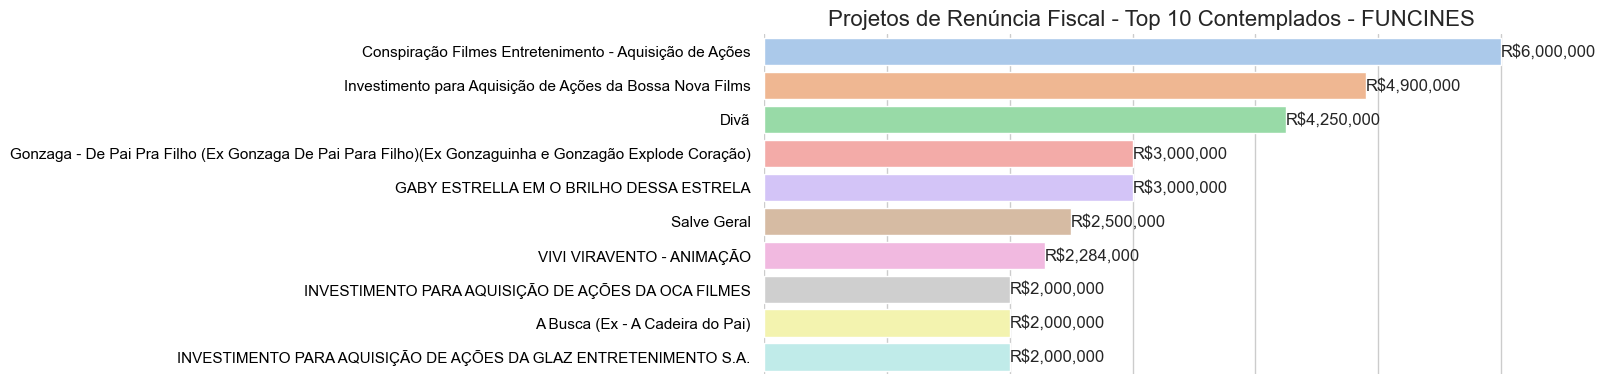

In [15]:
#Top 10 Investidores - Renúncia Fiscal
top_invest = df_proj_renun_fisc.sort_values(by='FUNCINES', ascending=False).head(10)

plt.figure(figsize=(16, 4))
sns.set_theme(style="whitegrid")


sns.set_color_codes("pastel")
sns.barplot(x="FUNCINES", y="TITULO_PROJETO", data=top_invest,
            label="FUNCINES", palette="pastel")

for index, value in enumerate(top_invest['FUNCINES']):
    plt.text(value, index, f'R${value:,.0f}', va='center', fontsize=12)

plt.xlabel("")
plt.ylabel("")
plt.title("Projetos de Renúncia Fiscal - Top 10 Contemplados - FUNCINES", fontsize=16)

sns.despine(left=True, bottom=True)

plt.yticks(color='black')

def format_labels(value, pos):
    return 

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_labels))
plt.tight_layout()
plt.show()


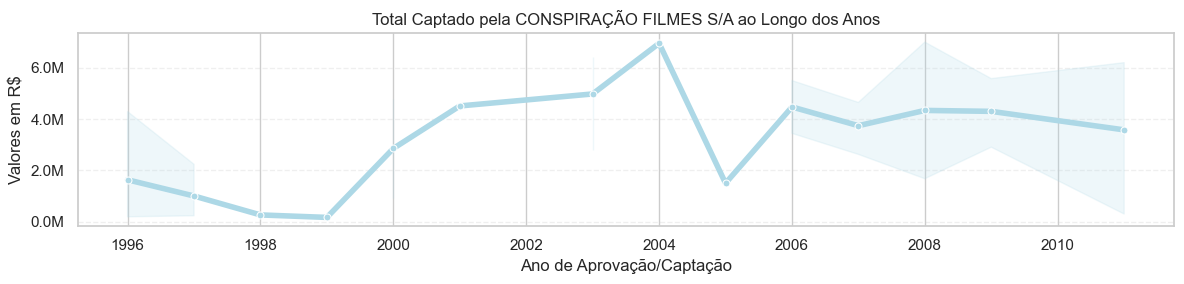

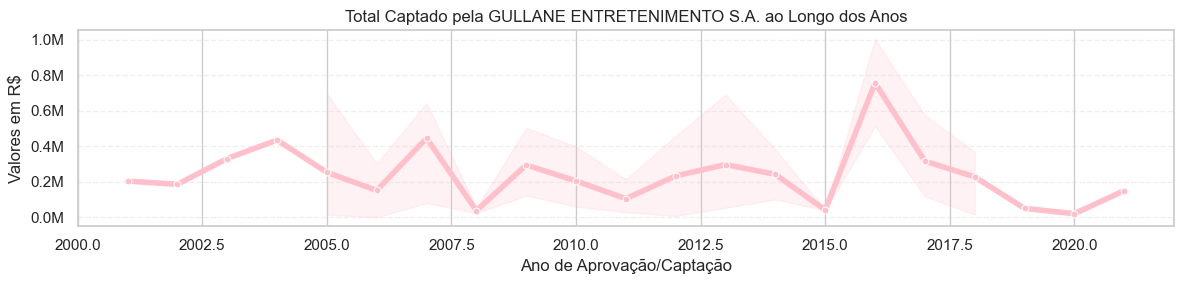

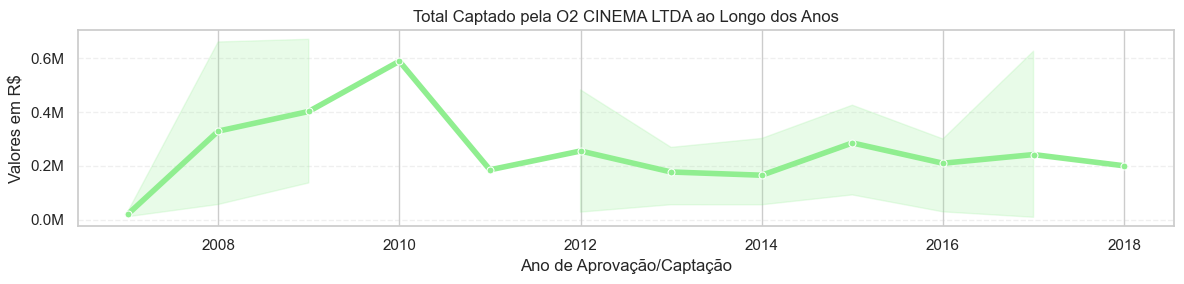

In [16]:
df = df_proj_renun_fisc[df_proj_renun_fisc['RAZAO_SOCIAL_PROPONENTE'] == 'CONSPIRAÇÃO FILMES S/A'].sort_values(by='ANO_APROVACAO')
plt.figure(figsize=(12, 3))

# Using a bold line style and increasing the size
sns.lineplot(data=df, x='ANO_APROVACAO', y='TOTAL_CAPTADO', marker='o', markersize=5, linewidth=4, color='lightblue')

# Using a different color palette
sns.set_palette("mako_r")

def currency_formatter(y, pos):
    return "{:.1f}M".format(y / 1000000)

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.xlabel('Ano de Aprovação/Captação')
plt.ylabel('Valores em R$')
plt.title('Total Captado pela CONSPIRAÇÃO FILMES S/A ao Longo dos Anos')

plt.tight_layout()
plt.show()

#--------------------------------------------------


df2 = df_proj_renun_fisc[df_proj_renun_fisc['RAZAO_SOCIAL_PROPONENTE'] == 'GULLANE ENTRETENIMENTO S.A.'].sort_values(by='ANO_APROVACAO')
plt.figure(figsize=(12, 3))

# Using a bold line style and increasing the size
sns.lineplot(data=df2, x='ANO_APROVACAO', y='TOTAL_CAPTADO', marker='o', markersize=5, linewidth=4, color='pink')

# Using a different color palette
sns.set_palette("mako_r")

def currency_formatter(y, pos):
    return "{:.1f}M".format(y / 10000000)

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.xlabel('Ano de Aprovação/Captação')
plt.ylabel('Valores em R$')
plt.title('Total Captado pela GULLANE ENTRETENIMENTO S.A. ao Longo dos Anos')

plt.tight_layout()
plt.show()

#--------------------------------------------------


df2 = df_proj_renun_fisc[df_proj_renun_fisc['RAZAO_SOCIAL_PROPONENTE'] == 'O2 CINEMA LTDA'].sort_values(by='ANO_APROVACAO')
plt.figure(figsize=(12, 3))

# Using a bold line style and increasing the size
sns.lineplot(data=df2, x='ANO_APROVACAO', y='TOTAL_CAPTADO', marker='o', markersize=5, linewidth=4, color='lightgreen')

# Using a different color palette
sns.set_palette("mako_r")

def currency_formatter(y, pos):
    return "{:.1f}M".format(y / 10000000)

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.xlabel('Ano de Aprovação/Captação')
plt.ylabel('Valores em R$')
plt.title('Total Captado pela O2 CINEMA LTDA ao Longo dos Anos')

plt.tight_layout()
plt.show()


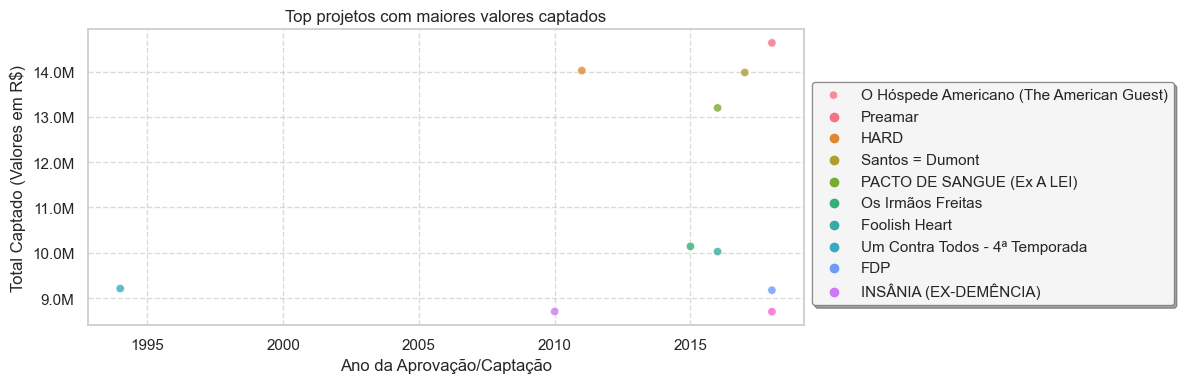

In [17]:
conspira_nome = {'CONSPIRAÇÃO FILMES ENTRETENIMENTO 3º MILÊNIO LTDA.': 'CONSPIRAÇÃO FILMES S/A'}
df_proj_renun_fisc['RAZAO_SOCIAL_PROPONENTE'] = df_proj_renun_fisc['RAZAO_SOCIAL_PROPONENTE'].replace(conspira_nome)

top_proj_renun_fisc = df_proj_renun_fisc.sort_values(by='TOTAL_CAPTADO', ascending=False).head(10)
plt.figure(figsize=(12, 4))

# Using a larger marker size for better visibility
sns.scatterplot(data=top_proj_renun_fisc, x='ANO_APROVACAO', y='TOTAL_CAPTADO', 
                alpha=0.8, hue='TITULO_PROJETO')

plt.xlabel('Ano da Aprovação/Captação')
plt.ylabel('Total Captado (Valores em R$)')
plt.title('Top projetos com maiores valores captados')

# Show grid lines for better readability
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Specify the desired project titles for the legend
legend_labels = ['O Hóspede Americano (The American Guest)', 'Preamar', 'HARD', 'Santos = Dumont', 'PACTO DE SANGUE (Ex A LEI)', 
                 'Os Irmãos Freitas', 'Foolish Heart', 'Um Contra Todos - 4ª Temporada', 'FDP', 'INSÂNIA (EX-DEMÊNCIA)']

# Show the legend with the specified labels and background color
plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 0.848), labelspacing=0.5, framealpha=0.9, frameon=True, shadow=True, edgecolor='gray')

def currency_formatter(y, pos):
    return "{:.1f}M".format(y / 1000000)

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.tight_layout()
plt.show()


---

## EDA - FSA - Fundo Setorial Audiovisual

In [18]:
df_proj_fsa_desemb.head(5)

,IDENTIFICACAO_CONTRATO,TITULO_PROJETO,CHAMADA_PUBLICA,ANO_CHAMADA_PUBLICA,CNPJ_PROPONENTE,RAZAO_SOCIAL_PROPONENTE,RAZAO_SOCIAL_PRODUTORA,RAZAO_SOCIAL_DISTRIBUIDORA_PROGRAMADORA,DT_PUBLICACAO_CONTRATO_DOU,VL_CONTRATO_DOU,DT_PRIMEIRO_DESEMBOLSO,VL_TOTAL_LIBERADO
0,02.09.0557.00,DE PERNAS PRO AR,PRODECINE 02,2008-01-01,07.616.202/0001-01,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,MORENA FILMES EIRELI - ME,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-08,3000000.0,2009-12-21,3000000.0
1,02.09.0558.00,DESENROLA,PRODECINE 02,2008-01-01,07.616.202/0001-01,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,RACCORD PRODUÇÕES ARTÍSTICAS E CINEMATOGRÁFICA...,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-08,2000000.0,2009-12-21,2000000.0
2,02.09.0601.00,HISTÓRIAS DE AMOR DURAM APENAS 90 MINUTOS,PRODECINE 01,2008-01-01,31.939.739/0001-97,TIPOS E TEMPOS PRODUÇÕES LTDA,TIPOS E TEMPOS PRODUÇÕES LTDA,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-24,300000.0,2010-01-13,300000.0
3,02.09.0592.00,INSOLAÇÃO,PRODECINE 01,2008-01-01,05.919.250/0001-43,"CISMA PRODUÇÕES CINEMATOGRÁFICAS, EVENTOS E TE...","CISMA PRODUÇÕES CINEMATOGRÁFICAS, EVENTOS E TE...",CANNES PRODUÇÕES S/A,2009-12-24,500000.0,2010-01-15,500000.0
4,02.09.0614.00,DO COMEÇO AO FIM,PRODECINE 01,2008-01-01,03.838.776/0001-73,HARE FILMES PRODUCOES LTDA - ME,HARE FILMES PRODUCOES LTDA - ME,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-29,461740.0,2010-01-13,461740.0


In [19]:
mapping = {
    'PRODAV 01': 'PRODAV',
    'PRODAV 02': 'PRODAV',
    'PRODAV 03': 'PRODAV',
    'PRODAV 04': 'PRODAV',
    'PRODAV 05': 'PRODAV',
    'PRODAV 06': 'PRODAV',
    'PRODAV 07': 'PRODAV',
    'PRODAV 08': 'PRODAV',
    'PRODAV 09': 'PRODAV',
    'PRODAV 10': 'PRODAV',
    'PRODAV 11': 'PRODAV',
    'PRODAV 12': 'PRODAV',
    'PRODAV 13': 'PRODAV',
    'PRODAV 14': 'PRODAV',
    'PRODAV 02 - PROJETO DERIVADO': 'PRODAV',
    'PRODAV - TVS PÚBLICAS': 'PRODAV',
    'PRODAV 06/SUPORTE AUTOMÁTICO - DESEMPENHO COMERCIAL CINEMA': 'PRODAV',
    'PRODAV 07/SUPORTE AUTOMÁTICO - DESEMPENHO COMERCIAL CINEMA': 'PRODAV',
    'PRODAV 06/PRODAV 07': 'PRODAV',
    'PRODECINE 01': 'PRODECINE',
    'PRODECINE 02': 'PRODECINE',
    'PRODECINE 03': 'PRODECINE',
    'PRODECINE 04': 'PRODECINE',
    'PRODECINE 05': 'PRODECINE',
    'PRODECINE 06': 'PRODECINE',
    'PRODECINE 07': 'PRODECINE',
    'PRODECINE 08': 'PRODECINE',
    'PRODECINE 09': 'PRODECINE',
    'PRODECINE 10': 'PRODECINE',
    'PRODECINE 11': 'PRODECINE',
    'PRODECINE 12': 'PRODECINE',
    'PRODECINE 13': 'PRODECINE',
    'SAV/MINC 01': 'SAV/MINC',
    'SAV/MINC 02': 'SAV/MINC',
    'SAV/MINC 03': 'SAV/MINC',
    'SAV/MINC 04': 'SAV/MINC',
    'SAV/MINC 05': 'SAV/MINC',
    'SAV/MINC 06': 'SAV/MINC',
    'SAV/MINC 07': 'SAV/MINC',
    'SAV/MINC 08': 'SAV/MINC',
    'SAV/MINC 09': 'SAV/MINC',
    'SAV/MINC 10': 'SAV/MINC',
    'SAV/MINC 11': 'SAV/MINC',
    'SAV/MINC 12': 'SAV/MINC',
    'SAV/MINC 13': 'SAV/MINC',
    'SAV/MINC 14': 'SAV/MINC',
    'SAV/MINC 15': 'SAV/MINC',
}
chamada_publica = df_proj_fsa_desemb
chamada_publica['CHAMADA_PUBLICA'].replace(mapping, inplace=True)


top_10 = df_proj_fsa_desemb.sort_values('VL_TOTAL_LIBERADO', ascending=False).head(10)
chamada_publica['CHAMADA_PUBLICA']. value_counts()

CHAMADA_PUBLICA
PRODAV                                                                                                           1979
PRODECINE                                                                                                         785
ARRANJOS REGIONAIS                                                                                                402
SAV/MINC                                                                                                          318
PROGRAMA ESPECIAL DE APOIO AO PEQUENO EXIBIDOR  PEAPE                                                            149
CRÉDITO EMERGENCIAL FSA                                                                                           132
COMERCIALIZAÇÃO EM CINEMA                                                                                          92
FLUXO CONTÍNUO PRODUÇÃO PARA CINEMA                                                                                63
CONCURSO PRODUÇÃO PARA CINEMA           

---

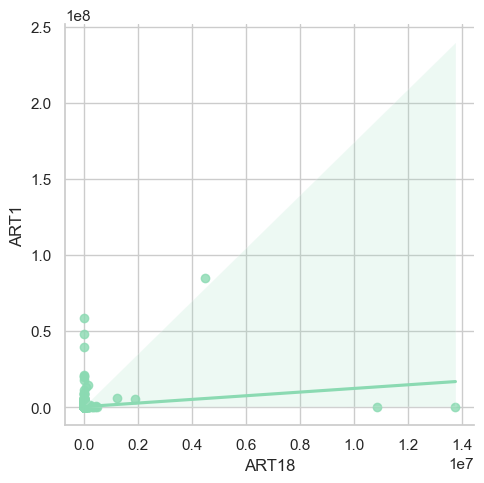

In [20]:
datay = df_invest_proj_renun_fiscal[['ART1', 'ART1A', 'ART3']]
inve = df_invest_proj_renun_fiscal['INVESTIDOR'].value_counts().head(10)

sns.lmplot(x='ART18', y='ART1', data=df_invest_proj_renun_fiscal)

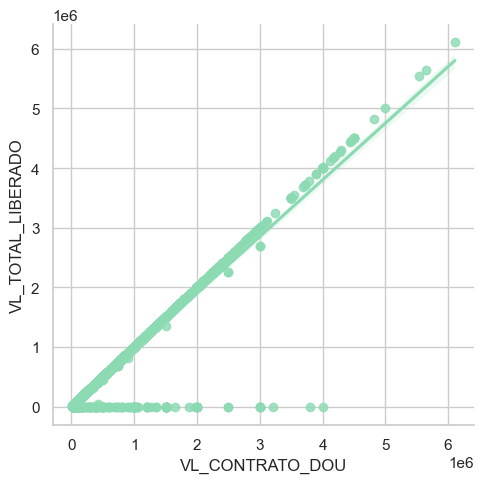

In [21]:
sns.lmplot(x='VL_CONTRATO_DOU', y='VL_TOTAL_LIBERADO', data=df_proj_fsa_desemb)

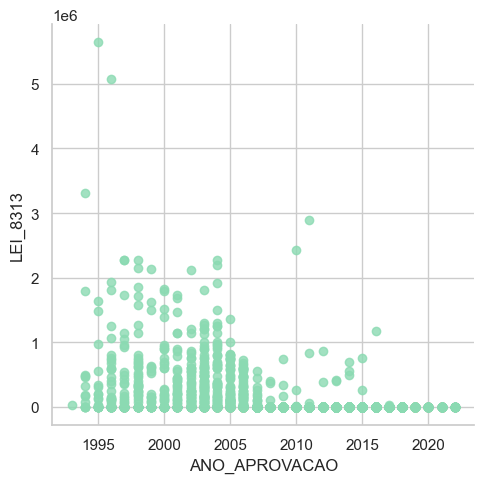

In [22]:
sns.lmplot(y='LEI_8313', x='ANO_APROVACAO', data=df_proj_renun_fisc, fit_reg=False)

<Axes: >

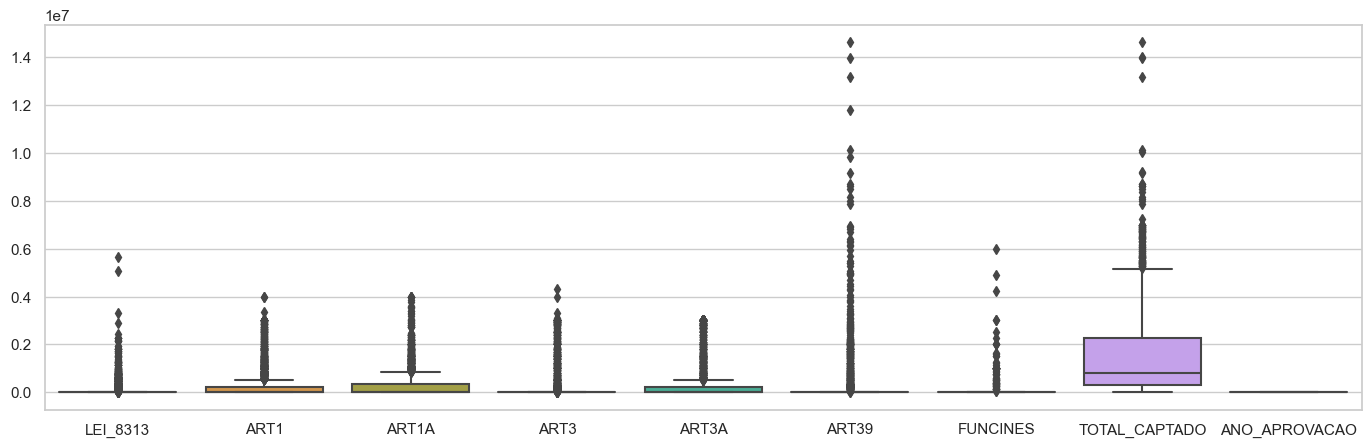

In [23]:
plt.figure(figsize=(17,5))
sns.boxplot(df_proj_renun_fisc)

<Axes: >

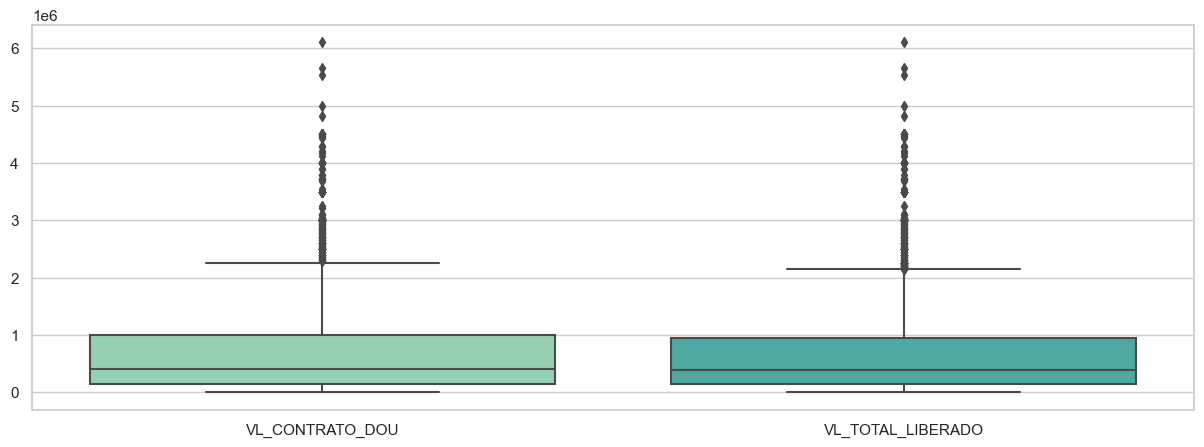

In [24]:
plt.figure(figsize=(15,5))
sns.boxplot(df_proj_fsa_desemb)

<Axes: >

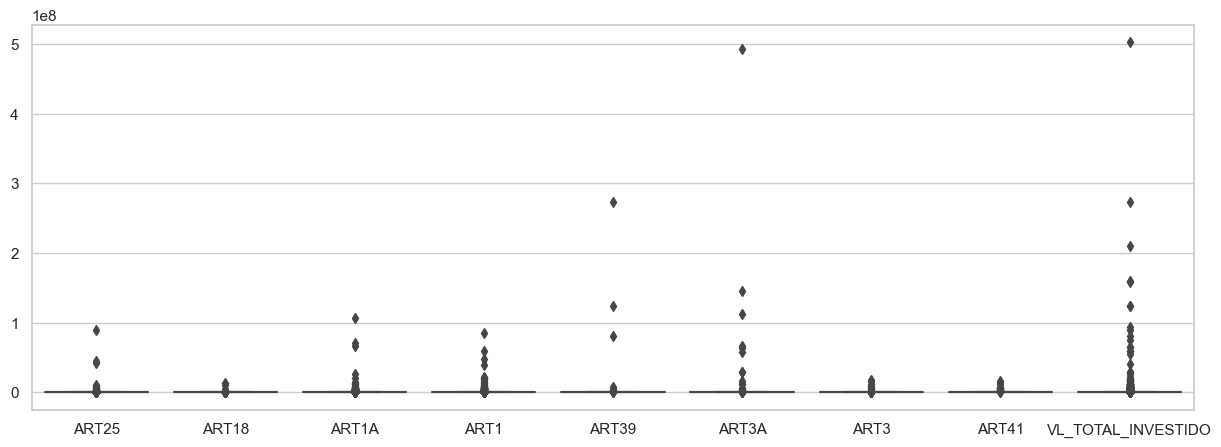

In [25]:
plt.figure(figsize=(15,5))
sns.boxplot(df_invest_proj_renun_fiscal)

In [26]:
def replace(df, column):
    df[column] = df[column].astype(str)
    df[column] = df[column].str.replace('.', ',')

replace(df_invest_proj_renun_fiscal, 'ART25')
replace(df_invest_proj_renun_fiscal, 'ART18')
replace(df_invest_proj_renun_fiscal, 'ART1A')
replace(df_invest_proj_renun_fiscal, 'ART1')
replace(df_invest_proj_renun_fiscal, 'ART39')
replace(df_invest_proj_renun_fiscal, 'ART3A')
replace(df_invest_proj_renun_fiscal, 'ART3')
replace(df_invest_proj_renun_fiscal, 'ART41')
replace(df_invest_proj_renun_fiscal, 'VL_TOTAL_INVESTIDO')
replace(df_proj_renun_fisc, 'TOTAL_CAPTADO')
replace(df_proj_renun_fisc, 'ART1')
replace(df_proj_renun_fisc, 'ART1A')
replace(df_proj_renun_fisc, 'ART3')
replace(df_proj_renun_fisc, 'ART39')
replace(df_proj_renun_fisc, 'ART3A')
replace(df_proj_renun_fisc, 'FUNCINES')
replace(df_proj_renun_fisc, 'LEI_8313')
replace(df_proj_fsa_desemb, 'VL_CONTRATO_DOU')
replace(df_proj_fsa_desemb, 'VL_TOTAL_LIBERADO')


In [27]:
df_proj_fsa_desemb

,IDENTIFICACAO_CONTRATO,TITULO_PROJETO,CHAMADA_PUBLICA,ANO_CHAMADA_PUBLICA,CNPJ_PROPONENTE,RAZAO_SOCIAL_PROPONENTE,RAZAO_SOCIAL_PRODUTORA,RAZAO_SOCIAL_DISTRIBUIDORA_PROGRAMADORA,DT_PUBLICACAO_CONTRATO_DOU,VL_CONTRATO_DOU,DT_PRIMEIRO_DESEMBOLSO,VL_TOTAL_LIBERADO
0,02.09.0557.00,DE PERNAS PRO AR,PRODECINE,2008-01-01,07.616.202/0001-01,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,MORENA FILMES EIRELI - ME,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-08,"3000000,0",2009-12-21,"3000000,0"
1,02.09.0558.00,DESENROLA,PRODECINE,2008-01-01,07.616.202/0001-01,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,RACCORD PRODUÇÕES ARTÍSTICAS E CINEMATOGRÁFICA...,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-08,"2000000,0",2009-12-21,"2000000,0"
2,02.09.0601.00,HISTÓRIAS DE AMOR DURAM APENAS 90 MINUTOS,PRODECINE,2008-01-01,31.939.739/0001-97,TIPOS E TEMPOS PRODUÇÕES LTDA,TIPOS E TEMPOS PRODUÇÕES LTDA,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-24,"300000,0",2010-01-13,"300000,0"
3,02.09.0592.00,INSOLAÇÃO,PRODECINE,2008-01-01,05.919.250/0001-43,"CISMA PRODUÇÕES CINEMATOGRÁFICAS, EVENTOS E TE...","CISMA PRODUÇÕES CINEMATOGRÁFICAS, EVENTOS E TE...",CANNES PRODUÇÕES S/A,2009-12-24,"500000,0",2010-01-15,"500000,0"
4,02.09.0614.00,DO COMEÇO AO FIM,PRODECINE,2008-01-01,03.838.776/0001-73,HARE FILMES PRODUCOES LTDA - ME,HARE FILMES PRODUCOES LTDA - ME,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-29,"461740,0",2010-01-13,"461740,0"
...,...,...,...,...,...,...,...,...,...,...,...,...
3981,PR-03.882,LUPITA NO PLANETA DE GENTE GRANDE - 2ª TEMPORADA,PRODAV,2018-01-01,08.813.728/0001-44,J O DE QUEIROGA NETO - EPP,J O DE QUEIROGA NETO - EPP,SEM DISTRIBUIDORA/PROGRAMADORA,2021-02-18,"2000000,0",2021-02-28,"0,0"
3982,PR-03.948,O SILÊNCIO DAS OSTRAS,ARRANJOS REGIONAIS,2017-01-01,15.745.495/0001-55,TEMPERO FILMES LTDA,TEMPERO FILMES LTDA,OLHAR DE CINEMA DISTRIBUIDORA DE FILMES LTDA - ME,2021-02-18,"1650000,0",2021-02-28,"0,0"
3983,PR-03.916,PANELA AMAZÔNIA 1ª TEMPORADA,PRODAV,2016-01-01,26.242.766/0001-76,FONSECA & PAES LTDA,FONSECA & PAES LTDA,PBI - PROGRAMADORA BRASILEIRA INDEPENDENTE S.A,2021-02-18,"435143,47",2021-02-28,"0,0"
3984,PR-03.874,DRAMATURGIAS,PRODAV,2018-01-01,29.555.333/0001-69,R. SHIZUKO TAKAMATSU - FILMES,R. SHIZUKO TAKAMATSU - FILMES,SEM DISTRIBUIDORA/PROGRAMADORA,2021-02-22,"1000000,0",2021-02-28,"0,0"


In [28]:
# df_invest_proj_renun_fiscal.to_csv('df_invest_proj_renun_fiscal.csv')
# df_proj_renun_fisc.to_csv('df_proj_renun_fiscal.csv')
# df_proj_fsa_desemb.to_csv('df_proj_fsa_desemb.csv')

In [36]:
proj_es = df_proj_renun_fisc[df_proj_renun_fisc['UF_PROPONENTE'].isin(['ES'])]
proj_es

,SALIC,TITULO_PROJETO,UF_PROPONENTE,SITUACAO_REGISTRO,CNPJ_PROPONENTE,RAZAO_SOCIAL_PROPONENTE,LEI_8313,ART1,ART1A,ART3,ART3A,ART39,FUNCINES,TOTAL_CAPTADO,DT_APROVACAO_CAPTACAO,DT_1_LIBERACAO,ANO_APROVACAO
316,12-0516,HELENA,ES,IRREGULAR,01.592.538/0001-03,RMS PRODUÇÕES CINEMATOGRÁFICAS LTDA-ME,"0,0","484749,0","0,0","0,0","0,0","0,0","0,0","484749,0",2013-01-07,2018-09-17,2013
602,07-0279,Outro Sertão,ES,DEFERIDO,02.616.581/0001-16,GALPÃO PRODUÇÕES ARTÍSTICAS E CULTURAIS LTDA,"0,0","0,0","949827,59","0,0","0,0","0,0","0,0","949827,59",2007-10-22,2008-01-15,2007
2088,17-0202,A Incrível Jornada - A História das Baleias Ca...,ES,DEFERIDO,18.589.962/0001-93,FINORDIA PRODUÇÕES CULTURAIS LTDA - ME,"0,0","0,0","550474,36","0,0","0,0","0,0","0,0","550474,36",2017-06-02,2018-03-28,2017
2352,10-0407,Punhal,ES,DEFERIDO,31.478.621/0001-09,VERVE PRODUÇÕES E CONSULTORIA LTDA,"0,0","266500,0","40000,0","0,0","0,0","0,0","0,0","306500,0",2010-12-08,2011-08-10,2010
2353,97-0586,Morte da Mulata (A) - Filme,ES,DEFERIDO,31.478.621/0001-09,VERVE PRODUÇÕES E CONSULTORIA LTDA,"0,0","188390,0","0,0","0,0","0,0","0,0","0,0","188390,0",1996-11-29,2000-06-13,1996
2400,02-4052,A Rebelião dos Estudantes (Ex - Rebelião ...,ES,IRREGULAR,36.300.499/0001-08,PRO TEXTO COMUNICAÇÃO E CULTURA LTDA,"238550,0","0,0","0,0","0,0","0,0","0,0","0,0","238550,0",2002-11-26,2006-02-06,2002


In [56]:
def check_cnpj_in_dataframe(df, column, cnpj_list):
    matching_cnpjs = []

    for cnpj in cnpj_list:
        if df[column].str.contains(cnpj).any():
            matching_cnpjs.append(cnpj)

    return matching_cnpjs

In [57]:
# List of CNPJs
cnpjs = [
 '40.222.072/0001-06',
 '49.405.221/0001-39',
 '15.131.165/0001-70',
 '12.301.061/0001-78',
 '10.763.360/0001-07',
 '25.990.290/0001-99',
 '03.425.449/0001-90',
 '15.651.792/0001-31',
 '46.343.097/0001-36',
 '32.177.367/0001-71',
 '35.751.309/0001-06',
 '45.589.940/0001-04',
 '26.421.082/0001-31',
 '32.337.237/0001-59',
 '21.916.610/0001-00',
 '33.753.853/0001-53',
 '32.605.071/0001-04',
 '42.119.387/0001-40',
 '30.013.364/0001-77',
 '03.172.036/0001-40',
 '40.923.297/0001-81',
 '42.701.098/0001-54',
 '43.206.211/0001-98',
 '12.530.623/0001-55',
 '24.575.039/0001-03',
 '05.804.377/0001-17',
 '30.350.510/0001-50',
 '32.558.054/0001-63',
 '03.861.448/0001-98',
 '29.708.938/0001-42',
 '21.351.722/0001-60',
 '34.211.341/0001-28',
 '14.992.876/0001-76',
 '34.107.095/0001-69',
 '24.241.892/0001-80',
 '36.219.247/0001-40',
 '40.226.313/0001-87',
 '42.999.841/0001-02',
 '24.147.907/0001-46',
 '14.210.788/0001-75',
 '16.806.723/0001-12',
 '42.220.837/0001-96',
 '13.546.570/0001-23',
 '49.371.962/0001-46',
 '29.995.994/0001-05',
 '19.962.586/0001-01',
 '19.974.069/0001-44',
 '16.877.661/0001-30',
 '44.537.226/0001-00',
 '33.625.380/0001-09',
 '31.330.222/0001-04',
 '02.616.581/0001-16',
 '32.243.334/0001-82',
 '13.373.053/0001-08',
 '09.385.630/0001-04',
 '42.152.957/0001-01',
 '14.651.453/0001-92',
 '35.862.793/0001-32',
 '04.585.783/0001-73',
 '28.999.862/0001-99',
 '31.478.621/0001-09',
 '10.634.153/0001-44',
 '00.589.339/0001-75',
 '28.298.402/0001-33',
 '37.064.188/0001-41',
 '37.184.804/0001-06',
 '12.476.637/0001-38',
 '30.967.902/0001-62',
 '33.561.124/0001-03',
 '14.985.732/0001-92',
 '00.414.568/0001-59',
 '25.103.064/0001-49',
 '31.529.645/0001-40',
 '35.684.520/0001-45',
 '20.811.009/0001-90',
 '13.380.867/0001-61',
 '44.471.132/0001-77',
 '04.201.181/0001-75',
 '42.856.251/0001-12',
 '03.692.683/0001-83',
 '24.734.932/0001-26',
 '15.693.797/0001-27',
 '08.103.899/0001-80',
 '43.032.269/0001-62',
 '18.589.962/0001-93',
 '09.134.587/0001-04',
 '17.140.796/0001-80',
 '25.912.530/0001-37',
 '11.982.842/0001-02',
 '13.088.643/0001-80',
 '21.710.727/0001-32',
 '32.261.592/0001-91',
 '46.641.605/0001-62',
 '29.116.285/0001-02',
 '29.621.500/0001-22',
 '44.681.987/0001-22',
 '27.065.150/0001-30',
 '34.430.442/0001-90',
 '02.737.078/0001-19',
 '20.533.821/0001-09',
 '39.341.953/0001-59',
 '10.613.523/0001-67',
 '30.553.792/0001-92',
 '26.682.199/0001-79',
 '14.410.301/0001-06',
 '11.136.684/0001-70',
 '34.532.932/0001-05',
 '31.876.653/0001-62',
 '49.039.943/0001-17',
 '17.151.166/0001-01',
 '15.757.699/0001-06',
 '28.921.806/0001-31',
 '09.208.990/0001-22',
 '11.609.242/0001-01',
 '32.290.770/0001-02',
 '27.329.556/0001-82',
 '21.065.201/0001-47',
 '20.518.008/0001-51',
 '12.379.149/0001-02',
 '37.114.074/0001-69',
 '21.443.150/0001-40',
 '49.564.368/0001-71',
 '04.676.620/0001-04',
 '14.165.196/0001-89',
 '16.595.181/0001-86',
 '13.981.640/0001-71',
 '34.941.850/0001-06',
 '08.434.432/0001-12',
 '13.958.660/0001-21',
 '39.794.680/0001-06',
 '44.135.340/0001-03',
 '04.920.643/0001-04',
 '17.195.358/0001-10',
 '18.670.862/0001-97',
 '21.141.011/0001-61',
 '18.580.137/0001-28',
 '31.451.298/0001-80',
 '43.380.531/0001-60',
 '29.611.853/0001-41',
 '29.031.260/0001-06',
 '31.116.435/0001-20',
 '17.727.654/0001-14',
 '14.876.344/0001-73',
 '29.971.842/0001-72',
 '44.447.754/0001-60',
 '24.879.526/0001-51',
 '01.915.175/0001-91',
 '32.992.475/0001-06',
 '17.714.670/0001-72',
 '07.162.196/0001-60',
 '39.741.470/0001-41',
 '14.240.951/0001-42',
 '35.587.888/0001-95',
 '18.162.501/0001-30',
 '26.033.493/0001-50',
 '16.370.907/0001-82',
 '04.769.554/0001-09',
 '20.801.818/0001-10',
 '30.227.228/0001-80',
 '32.719.785/0001-43',
 '09.445.277/0001-00',
 '22.810.678/0001-72',
 '14.635.446/0001-05',
 '42.128.343/0001-86',
 '10.852.692/0001-50',
 '26.671.292/0001-88',
 '31.750.022/0001-00',
 '19.628.647/0001-90',
 '21.033.878/0001-01',
 '32.479.123/0001-43',
 '23.572.489/0001-71',
 '24.381.120/0001-44',
 '31.689.843/0001-70',
 '10.960.415/0001-60',
 '26.089.873/0001-06',
 '00.373.973/0001-76',
 '18.202.976/0001-02',
 '30.428.516/0001-00',
 '21.797.177/0001-30',
 '09.369.796/0001-29',
 '13.318.058/0001-20',
 '27.478.257/0001-00',
 '23.717.729/0001-89',
 '23.923.441/0001-60',
 '27.419.100/0001-03',
 '19.387.261/0001-34',
 '36.565.202/0001-28',
 '13.991.594/0001-91',
 '17.119.823/0001-33',
 '33.378.866/0001-90',
 '08.030.429/0001-33',
 '16.994.240/0001-99',
 '36.049.641/0001-88',
 '06.914.274/0001-72',
 '33.998.771/0001-79',
 '12.354.771/0001-66',
 '26.349.364/0001-75',
 '17.591.225/0001-62',
 '31.458.492/0001-97',
 '31.859.201/0001-72',
 '37.281.569/0001-82',
 '31.449.125/0001-27',
 '34.853.340/0001-87',
 '40.203.694/0001-89',
 '49.129.924/0001-81',
 '39.246.925/0001-52',
 '15.121.862/0001-40',
 '27.585.858/0001-11',
 '14.128.876/0001-22',
 '26.203.415/0001-56',
 '12.663.752/0001-11',
 '03.132.906/0001-58',
 '21.681.140/0001-42',
 '29.821.631/0001-53',
 '18.012.019/0001-13',
 '31.703.432/0001-92',
 '35.220.801/0001-47',
 '28.548.077/0001-10',
 '05.878.063/0001-69',
 '08.427.216/0001-40',
 '22.869.009/0001-76',
 '32.577.562/0001-99',
 '31.639.889/0001-85',
 '43.261.669/0001-40',
 '03.694.276/0001-05',
 '24.890.666/0001-20',
 '20.964.886/0001-09',
 '29.086.297/0001-31',
 '08.101.204/0001-20',
 '18.008.314/0001-04',
 '13.967.089/0001-01',
 '17.652.148/0001-03',
 '11.767.820/0001-20',
 '31.964.490/0001-70',
 '18.391.109/0001-62',
 '46.850.630/0001-56',
 '31.621.283/0001-12',
 '05.077.549/0001-06',
 '28.754.676/0001-90',
 '45.795.915/0001-79',
 '41.303.412/0001-88',
 '33.113.878/0001-92',
 '11.365.117/0001-95',
 '16.649.153/0001-02',
 '10.434.099/0001-93',
 '33.880.406/0001-65',
 '11.144.385/0001-87',
 '39.306.027/0001-42',
 '41.243.402/0001-02',
 '37.893.600/0001-36',
 '04.018.247/0001-96',
 '29.779.707/0001-20',
 '18.086.583/0001-80',
 '42.351.422/0001-51'
]

In [58]:
# Call the function to check CNPJs in the DataFrame
matching_cnpjs = check_cnpj_in_dataframe(df_proj_fsa_desemb, 'CNPJ_PROPONENTE', cnpjs)

# Print the CNPJs that were found in the DataFrame
print("Matching CNPJs:")
for cnpj in matching_cnpjs:
    print(cnpj)


Matching CNPJs:
10.763.360/0001-07
14.210.788/0001-75
02.616.581/0001-16
04.585.783/0001-73
08.103.899/0001-80
18.589.962/0001-93
21.710.727/0001-32
17.151.166/0001-01
18.580.137/0001-28
04.769.554/0001-09
14.635.446/0001-05
21.033.878/0001-01
09.369.796/0001-29
19.387.261/0001-34
14.128.876/0001-22
21.681.140/0001-42
31.703.432/0001-92
05.077.549/0001-06


In [64]:
df_proj_fsa_desemb




,IDENTIFICACAO_CONTRATO,TITULO_PROJETO,CHAMADA_PUBLICA,ANO_CHAMADA_PUBLICA,CNPJ_PROPONENTE,RAZAO_SOCIAL_PROPONENTE,RAZAO_SOCIAL_PRODUTORA,RAZAO_SOCIAL_DISTRIBUIDORA_PROGRAMADORA,DT_PUBLICACAO_CONTRATO_DOU,VL_CONTRATO_DOU,DT_PRIMEIRO_DESEMBOLSO,VL_TOTAL_LIBERADO
0,02.09.0557.00,DE PERNAS PRO AR,PRODECINE,2008-01-01,07.616.202/0001-01,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,MORENA FILMES EIRELI - ME,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-08,"3000000,0",2009-12-21,"3000000,0"
1,02.09.0558.00,DESENROLA,PRODECINE,2008-01-01,07.616.202/0001-01,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,RACCORD PRODUÇÕES ARTÍSTICAS E CINEMATOGRÁFICA...,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-08,"2000000,0",2009-12-21,"2000000,0"
2,02.09.0601.00,HISTÓRIAS DE AMOR DURAM APENAS 90 MINUTOS,PRODECINE,2008-01-01,31.939.739/0001-97,TIPOS E TEMPOS PRODUÇÕES LTDA,TIPOS E TEMPOS PRODUÇÕES LTDA,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-24,"300000,0",2010-01-13,"300000,0"
3,02.09.0592.00,INSOLAÇÃO,PRODECINE,2008-01-01,05.919.250/0001-43,"CISMA PRODUÇÕES CINEMATOGRÁFICAS, EVENTOS E TE...","CISMA PRODUÇÕES CINEMATOGRÁFICAS, EVENTOS E TE...",CANNES PRODUÇÕES S/A,2009-12-24,"500000,0",2010-01-15,"500000,0"
4,02.09.0614.00,DO COMEÇO AO FIM,PRODECINE,2008-01-01,03.838.776/0001-73,HARE FILMES PRODUCOES LTDA - ME,HARE FILMES PRODUCOES LTDA - ME,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-29,"461740,0",2010-01-13,"461740,0"
...,...,...,...,...,...,...,...,...,...,...,...,...
3981,PR-03.882,LUPITA NO PLANETA DE GENTE GRANDE - 2ª TEMPORADA,PRODAV,2018-01-01,08.813.728/0001-44,J O DE QUEIROGA NETO - EPP,J O DE QUEIROGA NETO - EPP,SEM DISTRIBUIDORA/PROGRAMADORA,2021-02-18,"2000000,0",2021-02-28,"0,0"
3982,PR-03.948,O SILÊNCIO DAS OSTRAS,ARRANJOS REGIONAIS,2017-01-01,15.745.495/0001-55,TEMPERO FILMES LTDA,TEMPERO FILMES LTDA,OLHAR DE CINEMA DISTRIBUIDORA DE FILMES LTDA - ME,2021-02-18,"1650000,0",2021-02-28,"0,0"
3983,PR-03.916,PANELA AMAZÔNIA 1ª TEMPORADA,PRODAV,2016-01-01,26.242.766/0001-76,FONSECA & PAES LTDA,FONSECA & PAES LTDA,PBI - PROGRAMADORA BRASILEIRA INDEPENDENTE S.A,2021-02-18,"435143,47",2021-02-28,"0,0"
3984,PR-03.874,DRAMATURGIAS,PRODAV,2018-01-01,29.555.333/0001-69,R. SHIZUKO TAKAMATSU - FILMES,R. SHIZUKO TAKAMATSU - FILMES,SEM DISTRIBUIDORA/PROGRAMADORA,2021-02-22,"1000000,0",2021-02-28,"0,0"


In [66]:
cnpjs_to_check = [
    '10.763.360/0001-07',
    '14.210.788/0001-75',
    '02.616.581/0001-16',
    '04.585.783/0001-73',
    '08.103.899/0001-80',
    '18.589.962/0001-93',
    '21.710.727/0001-32',
    '17.151.166/0001-01',
    '18.580.137/0001-28',
    '04.769.554/0001-09',
    '14.635.446/0001-05',
    '21.033.878/0001-01',
    '09.369.796/0001-29',
    '19.387.261/0001-34',
    '14.128.876/0001-22',
    '21.681.140/0001-42',
    '31.703.432/0001-92',
    '05.077.549/0001-06'
]

proj_desemb_es = pd.DataFrame(columns=df_proj_fsa_desemb.columns)

for cnpj in cnpjs_to_check:
    matching_rows = df_proj_fsa_desemb[df_proj_fsa_desemb['CNPJ_PROPONENTE'].str.contains(cnpj)]
    proj_desemb_es = pd.concat([proj_desemb_es, matching_rows])

proj_desemb_es.reset_index(drop=True, inplace=True)

proj_desemb_es.to_csv('df_proj_fsa_desemb.csv', encoding='utf-8')
